# Visualizing the gender gap in college majors

### Overview of dataset
<table>
<tbody><tr>
<th>Year</th>
<th>Agriculture</th>
<th>Architecture</th>
<th>Art and Performance</th>
<th>Biology</th>
<th>Business</th>
<th>Communications and Journalism</th>
<th>Computer Science</th>
<th>Education</th>
<th>Engineering</th>
<th>English</th>
<th>Foreign Languages</th>
<th>Health Professions</th>
<th>Math and Statistics</th>
<th>Physical Sciences</th>
<th>Psychology</th>
<th>Public Administration</th>
<th>Social Sciences and History</th>
</tr>
<tr>
<td>1970</td>
<td>4.229798</td>
<td>11.921005</td>
<td>59.7</td>
<td>29.088363</td>
<td>9.064439</td>
<td>35.3</td>
<td>13.6</td>
<td>74.535328</td>
<td>0.8</td>
<td>65.570923</td>
<td>73.8</td>
<td>77.1</td>
<td>38.0</td>
<td>13.8</td>
<td>44.4</td>
<td>68.4</td>
<td>36.8</td>
</tr>
<tr>
<td>1971</td>
<td>5.452797</td>
<td>12.003106</td>
<td>59.9</td>
<td>29.394403</td>
<td>9.503187</td>
<td>35.5</td>
<td>13.6</td>
<td>74.149204</td>
<td>1.0</td>
<td>64.556485</td>
<td>73.9</td>
<td>75.5</td>
<td>39.0</td>
<td>14.9</td>
<td>46.2</td>
<td>65.5</td>
<td>36.2</td>
</tr>
<tr>
<td>1972</td>
<td>7.420710</td>
<td>13.214594</td>
<td>60.4</td>
<td>29.810221</td>
<td>10.558962</td>
<td>36.6</td>
<td>14.9</td>
<td>73.554520</td>
<td>1.2</td>
<td>63.664263</td>
<td>74.6</td>
<td>76.9</td>
<td>40.2</td>
<td>14.8</td>
<td>47.6</td>
<td>62.6</td>
<td>36.1</td>
</tr>
</tbody></table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
women_degrees.dropna(inplace=True)

#For fun: conversion from RBG to hexadecimal notation

#Converts individual digit to base 16 notation
def dig_to_hex(digit):
    #print(digit)
    if digit == "10":
        digit = "A"
    elif digit == "11":
        digit = "B"
    elif digit == "12":
        digit = 'C'
    elif digit == "13":
        digit = "D"
    elif digit == "14":
        digit = "E"
    elif digit == "15":
        digit = "F"
    #print(digit)
    return digit

#Converts RGB values to hex notation
def to_hex(r,g,b):
    args = [int(r),int(g),int(b)]
    result = "#"
    for each in args:
        if each > 255 or each < 0:
            raise ValueError ("RGB value out of range (0-255)")
        first = dig_to_hex(str(each//16))
        second = dig_to_hex(str(each%16))
        result += first + second
    return result

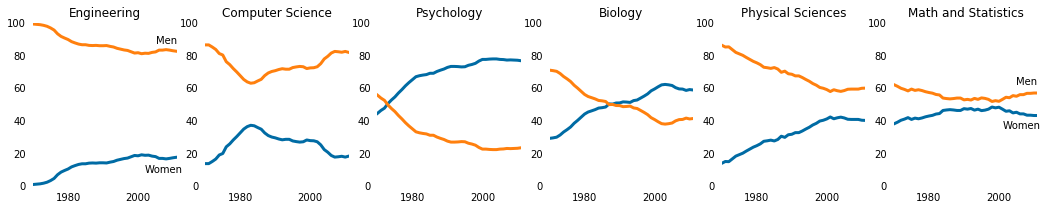

In [2]:
# Setting up previous data visualizing of gender gap across STEM fields

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,3))

for i in range(0,6):
    ax = fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees["Year"],women_degrees[stem_cats[i]],label="Women",c=cb_dark_blue,linewidth=3)
    ax.plot(women_degrees["Year"],100-women_degrees[stem_cats[i]],label="Men",c=cb_orange,linewidth=3)
    ax.tick_params(bottom="off",top="off",left='off',right="off")
    ax.set_ylim(0,100)
    ax.set_xlim(women_degrees.iloc[0]["Year"],women_degrees.iloc[-1]["Year"])
    ax.set_title(stem_cats[i])
    for key in ax.spines:
        ax.spines[key].set_visible(False)
fig.axes[0].text(2005,87,"Men")
fig.axes[0].text(2002,8,"Women")
fig.axes[5].text(2005,62,"Men")
fig.axes[5].text(2001,35,"Women")
        
plt.show()

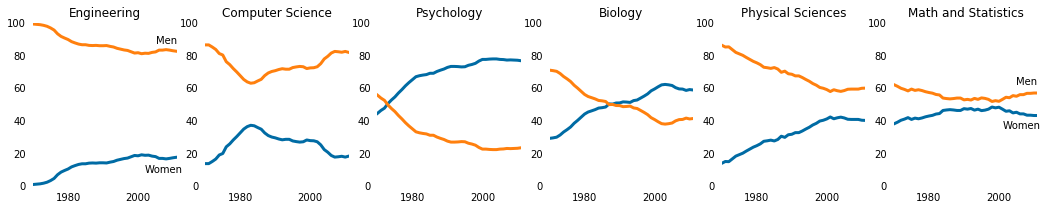

In [3]:
# Repeating above to verify my to_hex() method worked
cb_dark_blue = to_hex(0,107,164)
cb_orange = to_hex(255, 128, 14)

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,3))

for i in range(0,6):
    ax = fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees["Year"],women_degrees[stem_cats[i]],label="Women",c=cb_dark_blue,linewidth=3)
    ax.plot(women_degrees["Year"],100-women_degrees[stem_cats[i]],label="Men",c=cb_orange,linewidth=3)
    ax.tick_params(bottom="off",top="off",left='off',right="off")
    ax.set_ylim(0,100)
    ax.set_xlim(women_degrees.iloc[0]["Year"],women_degrees.iloc[-1]["Year"])
    ax.set_title(stem_cats[i])
    for key in ax.spines:
        ax.spines[key].set_visible(False)
fig.axes[0].text(2005,87,"Men")
fig.axes[0].text(2002,8,"Women")
fig.axes[5].text(2005,62,"Men")
fig.axes[5].text(2001,35,"Women")
        
plt.show()

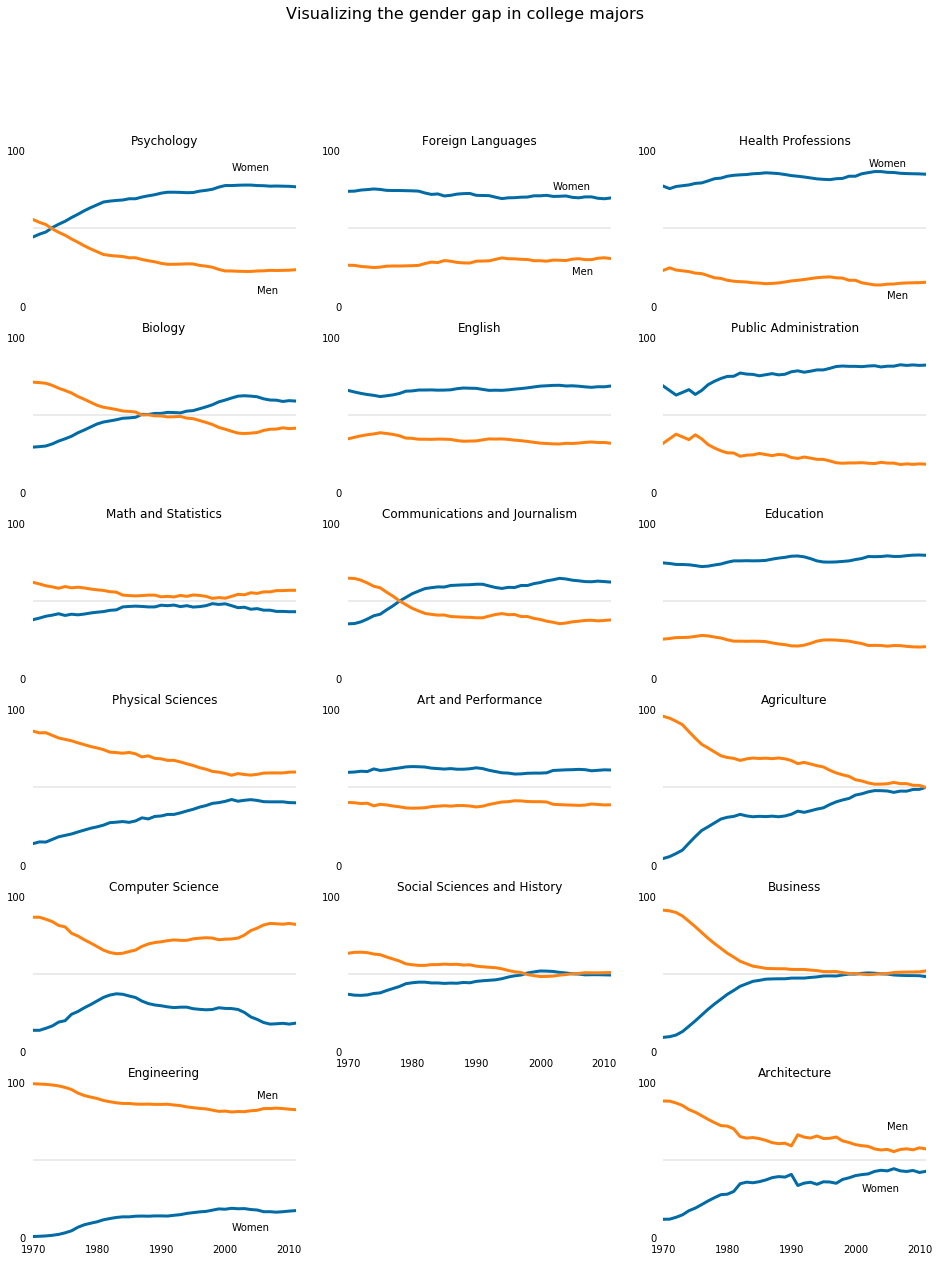

In [4]:
# Visualizing Gender gap across all fields

cb_light_gray = to_hex(171, 171, 171)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

all_cats = [stem_cats,lib_arts_cats,other_cats]

fig = plt.figure(figsize=(16,20))

for col_idx in range(0,3):
    for row_idx, each in enumerate(all_cats[col_idx]):
        plot_number = row_idx * 3 + col_idx + 1
        ax = fig.add_subplot(6,3,plot_number)
        ax.plot(women_degrees["Year"],women_degrees[each],label="Women",c=cb_dark_blue,linewidth=3)
        ax.plot(women_degrees["Year"],100-women_degrees[each],label="Men",c=cb_orange,linewidth=3)
        ax.tick_params(bottom="off",top="off",left="off",right="off")
        if (row_idx != len(all_cats[col_idx])-1): # if not the last plot, turn off xlabels
            ax.tick_params(labelbottom="off")
        ax.set_yticks([0,100])
        ax.set_ylim(0,100)
        ax.set_xlim(women_degrees.iloc[0]["Year"],women_degrees.iloc[-1]["Year"])
        ax.set_title(each)
        ax.axhline(50, c=cb_light_gray, alpha=0.3)
        for key in ax.spines:
            ax.spines[key].set_visible(False)
#Stem labels
fig.axes[0].text(2001,87,"Women")
fig.axes[0].text(2005,8,"Men")
fig.axes[5].text(2005,90,"Men")
fig.axes[5].text(2001,5,"Women")

#Liberal arts labels
fig.axes[6].text(2002,75,"Women")
fig.axes[6].text(2005,20,"Men")

#Other cats labels
fig.axes[11].text(2002,90,"Women")
fig.axes[11].text(2005,5,"Men")
fig.axes[16].text(2005,70,"Men")
fig.axes[16].text(2001,30,"Women")

plt.suptitle("Visualizing the gender gap in college majors",fontsize=16)
plt.savefig("gender_degrees.png")